In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [32]:
# Load the data
df = pd.read_csv("AusApparalSales4thQrt2020.csv")

In [33]:
# Display the first few rows of the data
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


## 1.Data Wrangling

In [35]:
# Check for incorrect data
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object


In [36]:
# Convert object to string
df['Time'] = df['Time'].astype('string')
df['State'] = df['State'].astype('string')
df['Group'] = df['Group'].astype('string')

In [37]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [38]:
df.dtypes

Date     datetime64[ns]
Time     string[python]
State    string[python]
Group    string[python]
Unit              int64
Sales             int64
dtype: object

In [39]:
# Check for missing values
print("Missing values per column by use isna():")
print(df.isna().sum())

Missing values per column by use isna():
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [40]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []


In [41]:
#replace space to NULL if found in the datafram
df = df.replace(" ", np.nan).replace("N/A", np.nan).replace("NA", np.nan)

In [42]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'Unit' column and add it to the DataFrame
df['normalized_Unit'] = scaler.fit_transform(df[['Unit']])

# Fit and transform the 'Sales' column and add it to the DataFrame
df['normalized_Sales'] = scaler.fit_transform(df[['Sales']])

df.describe()

,Date,Unit,Sales,normalized_Unit,normalized_Sales
count,7560,7560.000000,7560.000000,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201,0.254054,0.254054
min,2020-10-01 00:00:00,2.000000,5000.000000,0.000000,0.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000,0.095238,0.095238
50%,2020-11-15 12:00:00,14.000000,35000.000000,0.190476,0.190476
75%,2020-12-08 00:00:00,26.000000,65000.000000,0.380952,0.380952
max,2020-12-30 00:00:00,65.000000,162500.000000,1.000000,1.000000
std,NaN,12.901403,32253.506944,0.204784,0.204784


## 2.Data Analysis

In [44]:
# Descriptive statistics for the 'Sales' column
sales_stats = df['Sales'].describe().to_frame().transpose()

# Output the results for Sales
sales_stats

,count,mean,std,min,25%,50%,75%,max
Sales,7560.0,45013.558201,32253.506944,5000.0,20000.0,35000.0,65000.0,162500.0


In [45]:
# Descriptive statistics for the 'Unit' column
unit_stats = df['Unit'].describe().to_frame().transpose()

# Output the results for Unit
unit_stats

,count,mean,std,min,25%,50%,75%,max
Unit,7560.0,18.005423,12.901403,2.0,8.0,14.0,26.0,65.0


In [46]:
grouped_sales = df.groupby('Group').Sales.sum()

# Find the group names with maximum and minimum sales
group_max_sales = grouped_sales.idxmax()
group_min_sales = grouped_sales.idxmin()

print(f"The group '{group_max_sales}' generates the highest sales, while the group '{group_min_sales}' generates the lowest sales.")

The group ' Men' generates the highest sales, while the group ' Seniors' generates the lowest sales.


In [47]:
state_sales = df.groupby('State').Sales.sum()

# Find the state with maximum and minimum sales
state_max_sales = state_sales.idxmax()
state_min_sales = state_sales.idxmin()

print(f"The state '{state_max_sales}' generates the highest sales, while the state '{state_min_sales}' generates the lowest sales.")

The state ' VIC' generates the highest sales, while the state ' WA' generates the lowest sales.


In [48]:
daily_sales = df.set_index('Date').resample('D').agg({'Sales': 'sum', 'Unit': 'mean'})
print("daily Report:")
daily_sales

daily Report:


,Sales,Unit
Date,,
2020-10-01,3720000,17.714286
2020-10-02,3715000,17.690476
2020-10-03,3890000,18.523810
2020-10-04,3720000,17.714286
2020-10-05,3862500,18.392857
...,...,...
2020-12-26,4715000,22.452381
2020-12-27,4637500,22.083333
2020-12-28,4595000,21.880952


In [49]:
#Weekly Report
weekly_sales = df.set_index('Date').resample('W').agg({'Sales': 'sum', 'Unit': 'mean'})
print("Weekly Report:")
weekly_sales

Weekly Report:


,Sales,Unit
Date,,
2020-10-04,15045000,17.910714
2020-10-11,27002500,18.369048
2020-10-18,26640000,18.122449
2020-10-25,26815000,18.241497
2020-11-01,21807500,17.307540
2020-11-08,20865000,14.193878
2020-11-15,21172500,14.403061
2020-11-22,21112500,14.362245
2020-11-29,21477500,14.610544


In [50]:
#Monthly Report
monthly_sales = df.set_index('Date').resample('M').agg({'Sales': 'sum', 'Unit': 'mean'})
print("Monthly Report:")
monthly_sales

Monthly Report:


,Sales,Unit
Date,,
2020-10-31,114290000,18.141270
2020-11-30,90682500,14.394048
2020-12-31,135330000,21.480952


In [51]:
#Quarterly Report
quarterly_sales = df.set_index('Date').resample('Q').agg({'Sales': 'sum', 'Unit': 'mean'})
print("Quarterly Report:")
quarterly_sales

Quarterly Report:


,Sales,Unit
Date,,
2020-12-31,340302500,18.005423


In [67]:
# Print the time with the highest and lowest sales
print("Highest sales during:", time_sales_sorted.iloc[0]['Time'])
print("Lowest sales during:", time_sales_sorted.iloc[-1]['Time'])

Highest sales during:  Morning
Lowest sales during:  Evening


## 3.Data Visualization

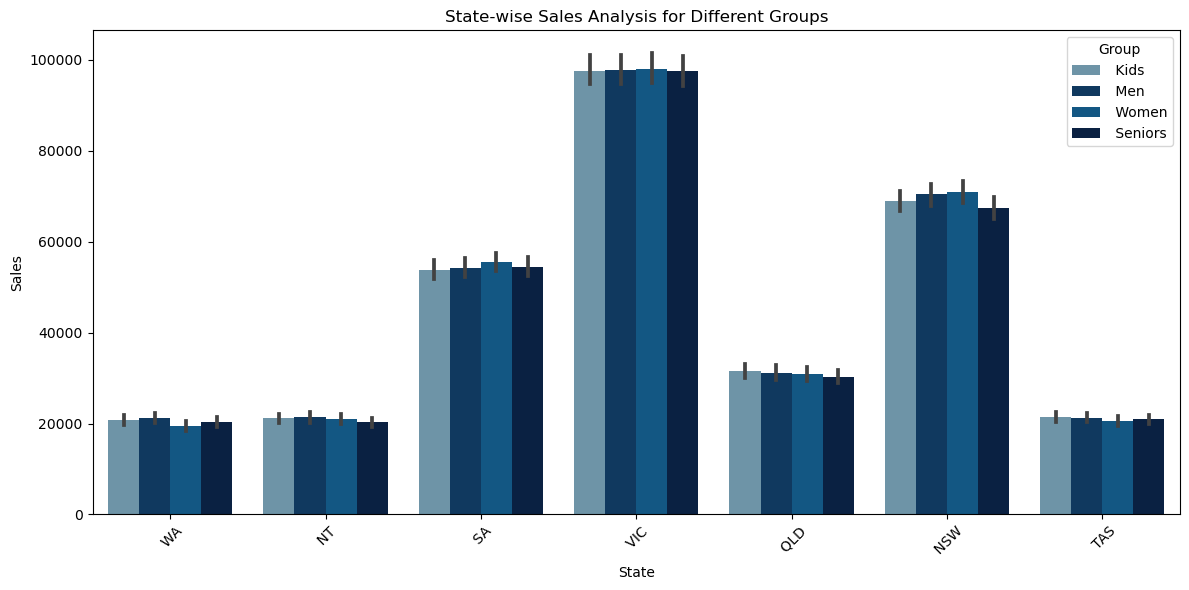

In [61]:
# Define custom color palette
custom_palette = ["#6497b1", "#03396c", "#005b96", "#011f4b"]  # Add your desired colors here

# State-wise sales analysis for different groups
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=df, palette=custom_palette)
plt.title('State-wise Sales Analysis for Different Groups')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

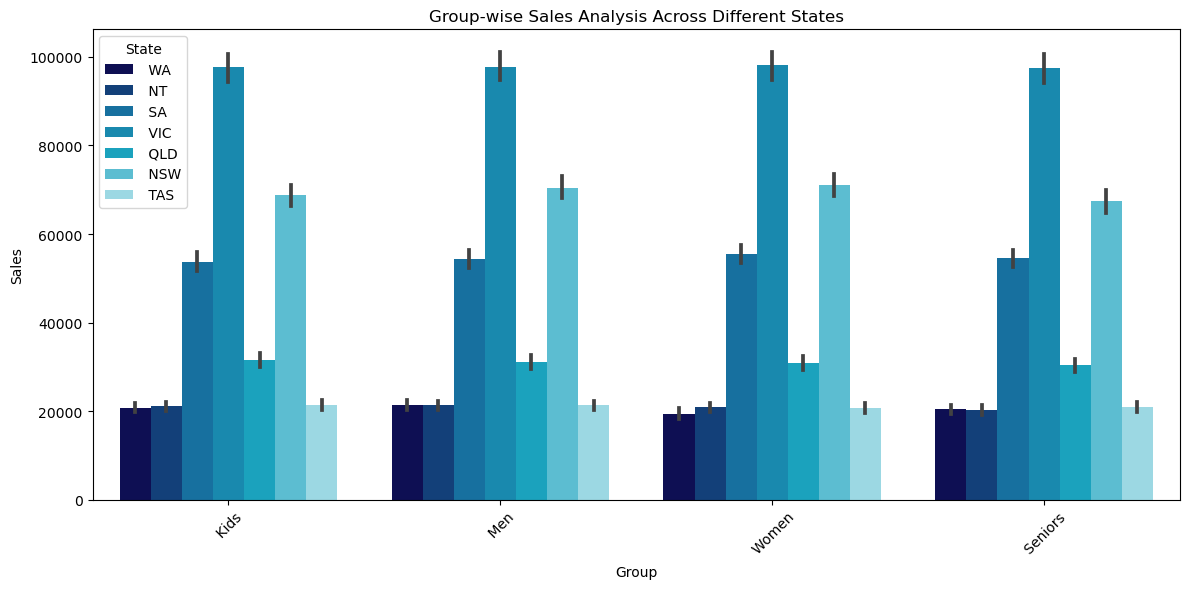

In [63]:
# Group-wise sales analysis across different states 
custom_palette = ["#03045e", "#023e8a", "#0077b6", "#0096c7", "#00b4d8", "#48cae4", "#90e0ef"]

plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='Sales', hue='State', data=df, palette=custom_palette)
plt.title('Group-wise Sales Analysis Across Different States')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.tight_layout()
plt.show()


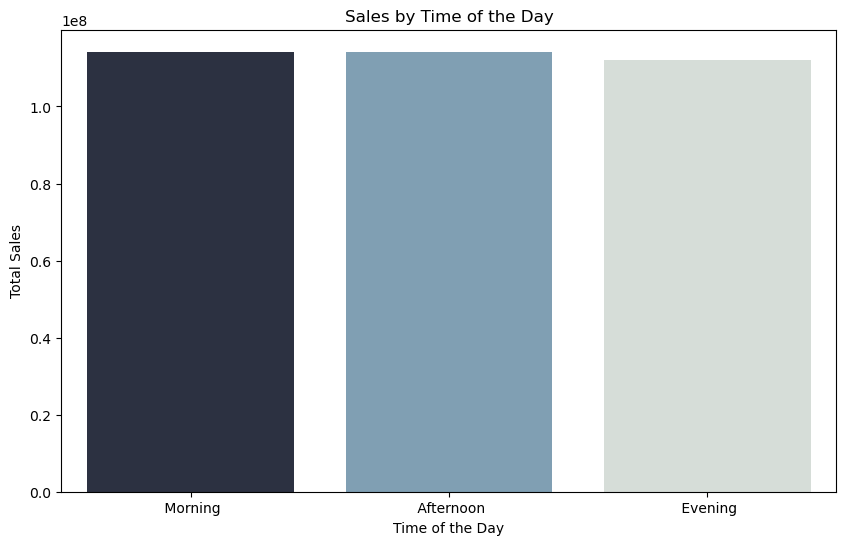

In [66]:
# Group the data by 'Time' and sum 'Sales'
time_sales = df.groupby('Time')['Sales'].sum().reset_index()

# Sort the results to identify highest and lowest sales times
time_sales_sorted = time_sales.sort_values(by='Sales', ascending=False)

custom_palette = ["#283044", "#78a1bb", "#D5DED7"]

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=time_sales_sorted, x='Time', y='Sales', order=time_sales_sorted['Time'], palette=custom_palette)
plt.title('Sales by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')
plt.show()